# Demo 1: Running an EnergyPlus simulation

This notebook gives a demo of running an EnergyPlus simluation using the `eprun` python package. 


## Introduction

## Setup

In [62]:
from eprun import eprun
idf_filepath='1ZoneUncontrolled.idf'
epw_filepath='USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw'

## Simulation run

In [63]:
result=eprun(idf_filepath,
             epw_filepath)
print(result.returncode)

0


## View results

In [64]:
end=result.get_end()
print(end.line)

EnergyPlus Completed Successfully-- 3 Warning; 0 Severe Errors; Elapsed Time=00hr 00min  2.56sec



In [65]:
err=result.get_err()
for warning in err.warnings: print(warning)

Weather file location will be used rather than entered (IDF) Location object.
..Location object=DENVER CENTENNIAL  GOLDEN   N_CO_USA DESIGN_CONDITIONS
..Weather File Location=San Francisco Intl Ap CA USA TMY3 WMO#=724940
..due to location differences, Latitude difference=[2.12] degrees, Longitude difference=[17.22] degrees.
..Time Zone difference=[1.0] hour(s), Elevation difference=[99.89] percent, [1827.00] meters.

SetUpDesignDay: Entered DesignDay Barometric Pressure=81198 differs by more than 10% from Standard Barometric Pressure=101301.
...occurs in DesignDay=DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB, Standard Pressure (based on elevation) will be used.

SetUpDesignDay: Entered DesignDay Barometric Pressure=81198 differs by more than 10% from Standard Barometric Pressure=101301.
...occurs in DesignDay=DENVER CENTENNIAL  GOLDEN   N ANN CLG 1% CONDNS DB=>MWB, Standard Pressure (based on elevation) will be used.



In [66]:
eso=result.get_eso()
eso

In [15]:
envs=eso.get_environments()
envs

[EPEsoSimuationEnvironment("DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB"),
 EPEsoSimuationEnvironment("DENVER CENTENNIAL  GOLDEN   N ANN CLG 1% CONDNS DB=>MWB"),
 EPEsoSimuationEnvironment("RUN PERIOD 1")]

In [ ]:
run_period1=envs[2]
run_period1.plot_variables()

In [36]:
run_period1=envs[2]
times=run_period1.get_interval_periods().get_start_times()
var1=run_period1.get_interval_variables()[0]

Text(0, 0.5, 'Site Outdoor Air Drybulb Temperature (C)')

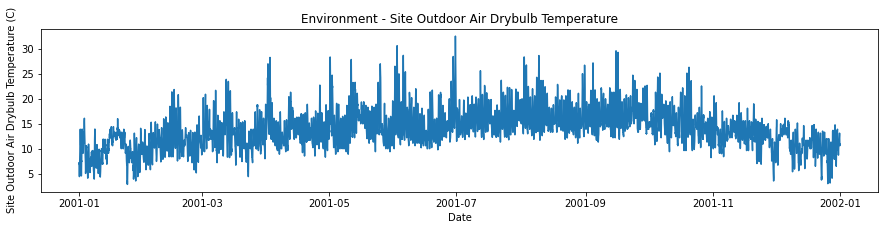

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(times, var1.values)
ax.set_title('%s - %s' % (var1.object_name, var1.quantity))
ax.set_xlabel('Date')
ax.set_ylabel('%s (%s)' % (var1.quantity,var1.unit))